# Loading data from csv to pandas dataframe

In [76]:
import pandas as pd

df = pd.read_csv(r'D:\Ashraf\NCI\Data Mining & Machine Learning\Project\Final Datasets\Network Intrusion\networkintrusion.csv')
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983.0,0.0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20.0,0.0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0.0,15.0,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794.0,333.0,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317.0,938.0,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540.0,8314.0,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,anomaly
22542,0,udp,domain_u,SF,42.0,42.0,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


In [77]:
# Number of independent and dependent variables
indep_var = df.columns[:-1]
indep_var_count = len(indep_var)
print('Number of independent variables: ', indep_var_count)

dep_var = df.columns[-1:]
dep_var_count = len(dep_var)
print('Number of dependent variables: ', dep_var_count)

Number of independent variables:  39
Number of dependent variables:  1


In [78]:
df.shape

(22544, 40)

In [79]:
# Number of records
num_records = len(df)
print("Number of records:", num_records)

Number of records: 22544


In [80]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                      float64
dst_bytes                      float64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
num_root                         int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                          float64
srv_count                      float64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate          

In [81]:
binary_columns = []
nominal_columns = []
categorical_columns = []
textual_columns = []
numerical_columns = []

for column, dtype in df.dtypes.items():
    if dtype == 'bool':
        binary_columns.append(column)
    elif dtype == 'object':
        if len(df[column].unique()) == 2:
            binary_columns.append(column)
        else:
            nominal_columns.append(column)
    elif dtype == 'category':
        categorical_columns.append(column)
    elif dtype == 'float64' or dtype == 'int64':
        numerical_columns.append(column)
    elif dtype == 'string':
        textual_columns.append(column)

print("Binary columns:", binary_columns)
print("\nNominal columns:", nominal_columns)
print("\nCategorical columns:", categorical_columns)
print("\nTextual columns:", textual_columns)
print("\nNumerical columns:", numerical_columns)

Binary columns: ['class']

Nominal columns: ['protocol_type', 'service', 'flag']

Categorical columns: []

Textual columns: []

Numerical columns: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'num_root', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


# Data Preprocessing

In [82]:
df.iloc[:,:20].head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_root,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login
0,0,tcp,private,REJ,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,tcp,private,REJ,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,tcp,ftp_data,SF,12983.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,icmp,eco_i,SF,20.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,tcp,telnet,RSTO,0.0,15.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,tcp,http,SF,267.0,14515.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,0,tcp,smtp,SF,1022.0,387.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,0,tcp,telnet,SF,129.0,174.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,0,tcp,http,SF,327.0,467.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,tcp,ftp,SF,26.0,157.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [83]:
df.iloc[:,20:].head(10)

,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,229.0,10.0,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
1,136.0,1.0,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
2,1.0,1.0,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal
3,1.0,65.0,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,anomaly
4,1.0,8.0,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,anomaly
5,4.0,4.0,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal
6,1.0,3.0,0.0,0.00,0.0,0.0,1.00,0.00,1.00,255,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal
7,1.0,1.0,0.0,0.00,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,anomaly
8,33.0,47.0,0.0,0.00,0.0,0.0,1.00,0.00,0.04,151,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal
9,1.0,1.0,0.0,0.00,0.0,0.0,1.00,0.00,0.00,52,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,anomaly


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22538 non-null  float64
 5   dst_bytes                    22538 non-null  float64
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [85]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,22544.0,218.859076,1407.176612,0.0,0.00,0.00,0.0000,57715.0
src_bytes,22538.0,10398.121706,472849.333214,0.0,0.00,54.00,287.0000,62825648.0
dst_bytes,22538.0,2055.583770,21221.899178,0.0,0.00,46.00,601.0000,1345927.0
land,22544.0,0.000311,0.017619,0.0,0.00,0.00,0.0000,1.0
wrong_fragment,22544.0,0.008428,0.142599,0.0,0.00,0.00,0.0000,3.0
urgent,22544.0,0.000710,0.036473,0.0,0.00,0.00,0.0000,3.0
hot,22544.0,0.105394,0.928428,0.0,0.00,0.00,0.0000,101.0
num_failed_logins,22544.0,0.021647,0.150328,0.0,0.00,0.00,0.0000,4.0
logged_in,22544.0,0.442202,0.496659,0.0,0.00,0.00,1.0000,1.0
num_compromised,22544.0,0.119899,7.269597,0.0,0.00,0.00,0.0000,796.0


In [86]:
na_count = df.isnull().sum()

na_count_df = pd.DataFrame({'Column': na_count.index, 'Missing Values': na_count.values})
na_count_df

,Column,Missing Values
0,duration,0
1,protocol_type,0
2,service,0
3,flag,0
4,src_bytes,6
5,dst_bytes,6
6,land,0
7,wrong_fragment,0
8,urgent,0
9,hot,0


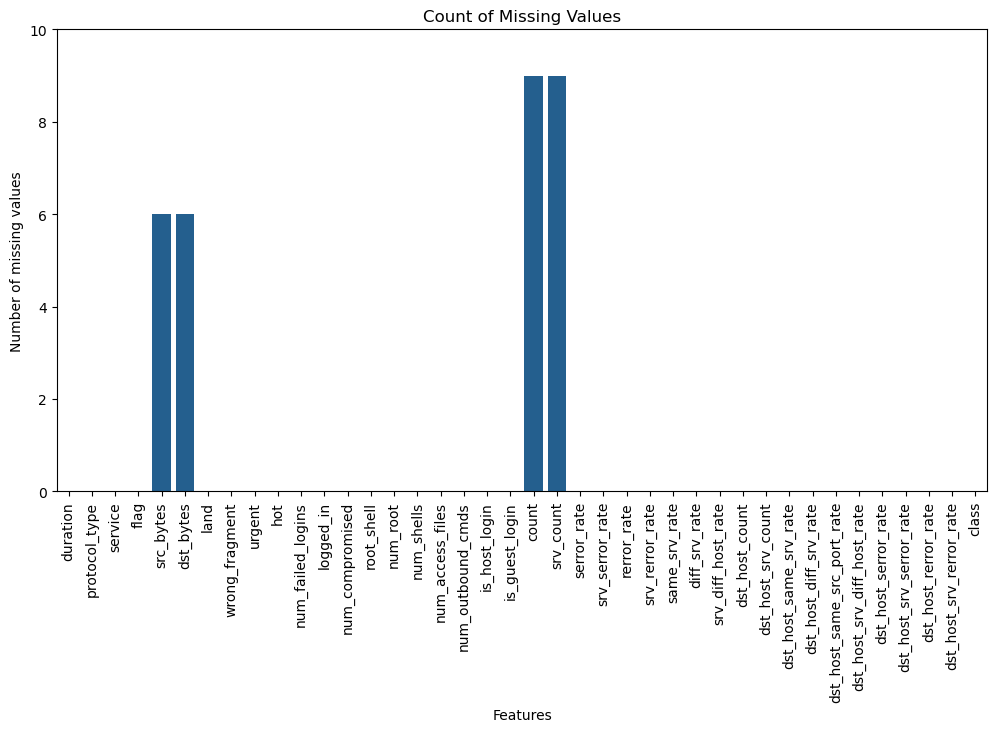

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_values_count = df.isnull().sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values_count.index, y=missing_values_count.values, color='#1261A0')
plt.ylabel('Number of missing values')
plt.xlabel('Features')
plt.title('Count of Missing Values')
plt.xticks(rotation=90)

plt.ylim(0, max(missing_values_count) + 1)

plt.show()

In [88]:
# Implying imputer to fill the null values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

columns_with_missing_values = ['src_bytes', 'dst_bytes', 'count', 'srv_count']

missing_data = df[columns_with_missing_values]

imputer = IterativeImputer(random_state=0)
imputed_data = pd.DataFrame(imputer.fit_transform(missing_data), columns=columns_with_missing_values)

for col in columns_with_missing_values:
    df[col] = imputed_data[col]

In [89]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
num_root                       0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_s

In [90]:
# Number of duplicates
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 3


In [91]:
df = df.drop_duplicates()

num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [92]:
# Dropping unecessary columns
df = df.drop(['land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins','logged_in', 'num_compromised', 'root_shell', 'num_root', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',  'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'], axis=1)
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'class'],
      dtype='object')

In [93]:
df['class'].unique()

array(['anomaly', 'normal'], dtype=object)

In [94]:
class_counts = df['class'].value_counts()

print(class_counts)

class
anomaly    12830
normal      9711
Name: count, dtype: int64


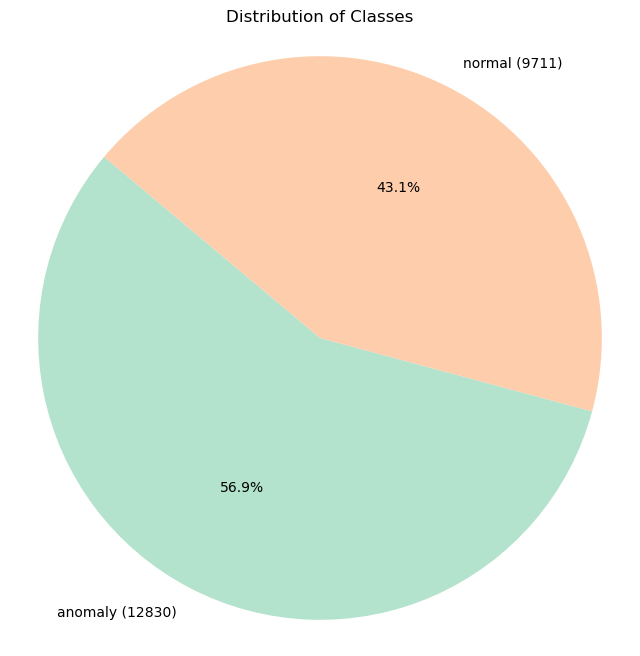

In [95]:
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=[f'{label} ({count})' for label, count in class_counts.items()], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes')
plt.axis('equal')
plt.show()

In [96]:
df['protocol_type'].unique()

array(['tcp', 'icmp', 'udp'], dtype=object)

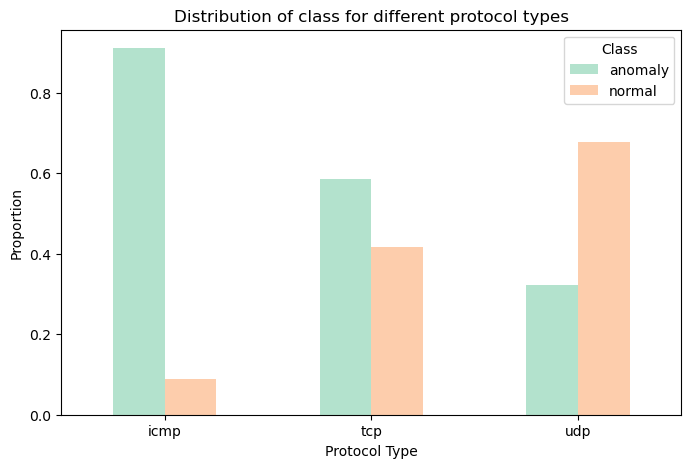

In [97]:
grouped = df.groupby('protocol_type')['class'].value_counts(normalize=True).unstack()

ax = grouped.plot(kind='bar', figsize=(8, 5))
plt.title('Distribution of class for different protocol types')
plt.xlabel('Protocol Type')
plt.ylabel('Proportion')
plt.legend(title='Class')
plt.xticks(rotation=0)
plt.show()

In [98]:
df['service'].unique()

array(['private', 'ftp_data', 'eco_i', 'telnet', 'http', 'smtp', 'ftp',
       'ldap', 'pop_3', 'courier', 'discard', 'ecr_i', 'imap4',
       'domain_u', 'mtp', 'systat', 'iso_tsap', 'other', 'csnet_ns',
       'finger', 'uucp', 'whois', 'netbios_ns', 'link', 'Z39_50',
       'sunrpc', 'auth', 'netbios_dgm', 'uucp_path', 'vmnet', 'domain',
       'name', 'pop_2', 'http_443', 'urp_i', 'login', 'gopher', 'exec',
       'time', 'remote_job', 'ssh', 'kshell', 'sql_net', 'shell',
       'hostnames', 'echo', 'daytime', 'pm_dump', 'IRC', 'netstat', 'ctf',
       'nntp', 'netbios_ssn', 'tim_i', 'supdup', 'bgp', 'nnsp', 'rje',
       'printer', 'efs', 'X11', 'ntp_u', 'klogin', 'tftp_u'], dtype=object)

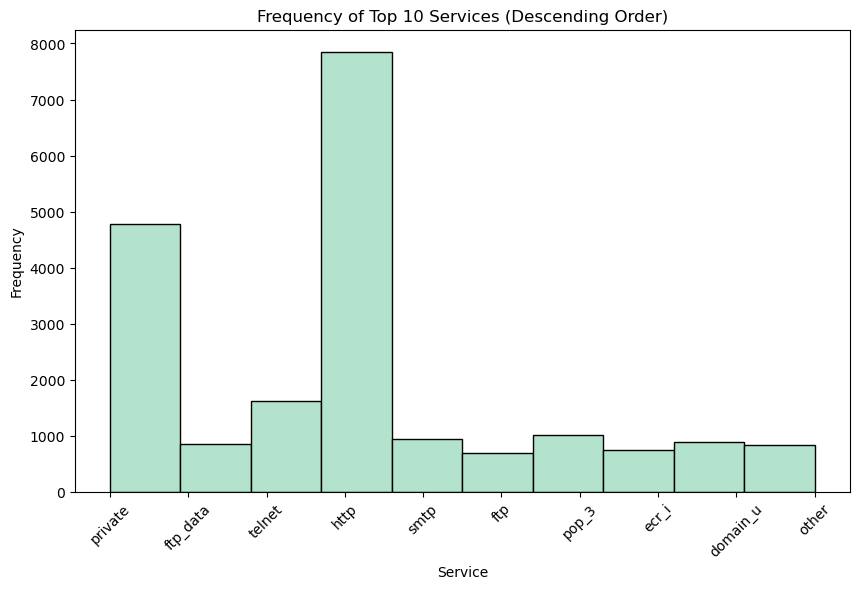

In [99]:
top_n = 10 
top_services = df['service'].value_counts().nlargest(top_n).index
top_services_sorted = top_services[::-1]

df_top_services = df[df['service'].isin(top_services_sorted)]

plt.figure(figsize=(10, 6))
plt.hist(df_top_services['service'], bins=top_n, edgecolor='black')
plt.title('Frequency of Top {} Services (Descending Order)'.format(top_n))
plt.xlabel('Service')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6620\3577316743.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.95])


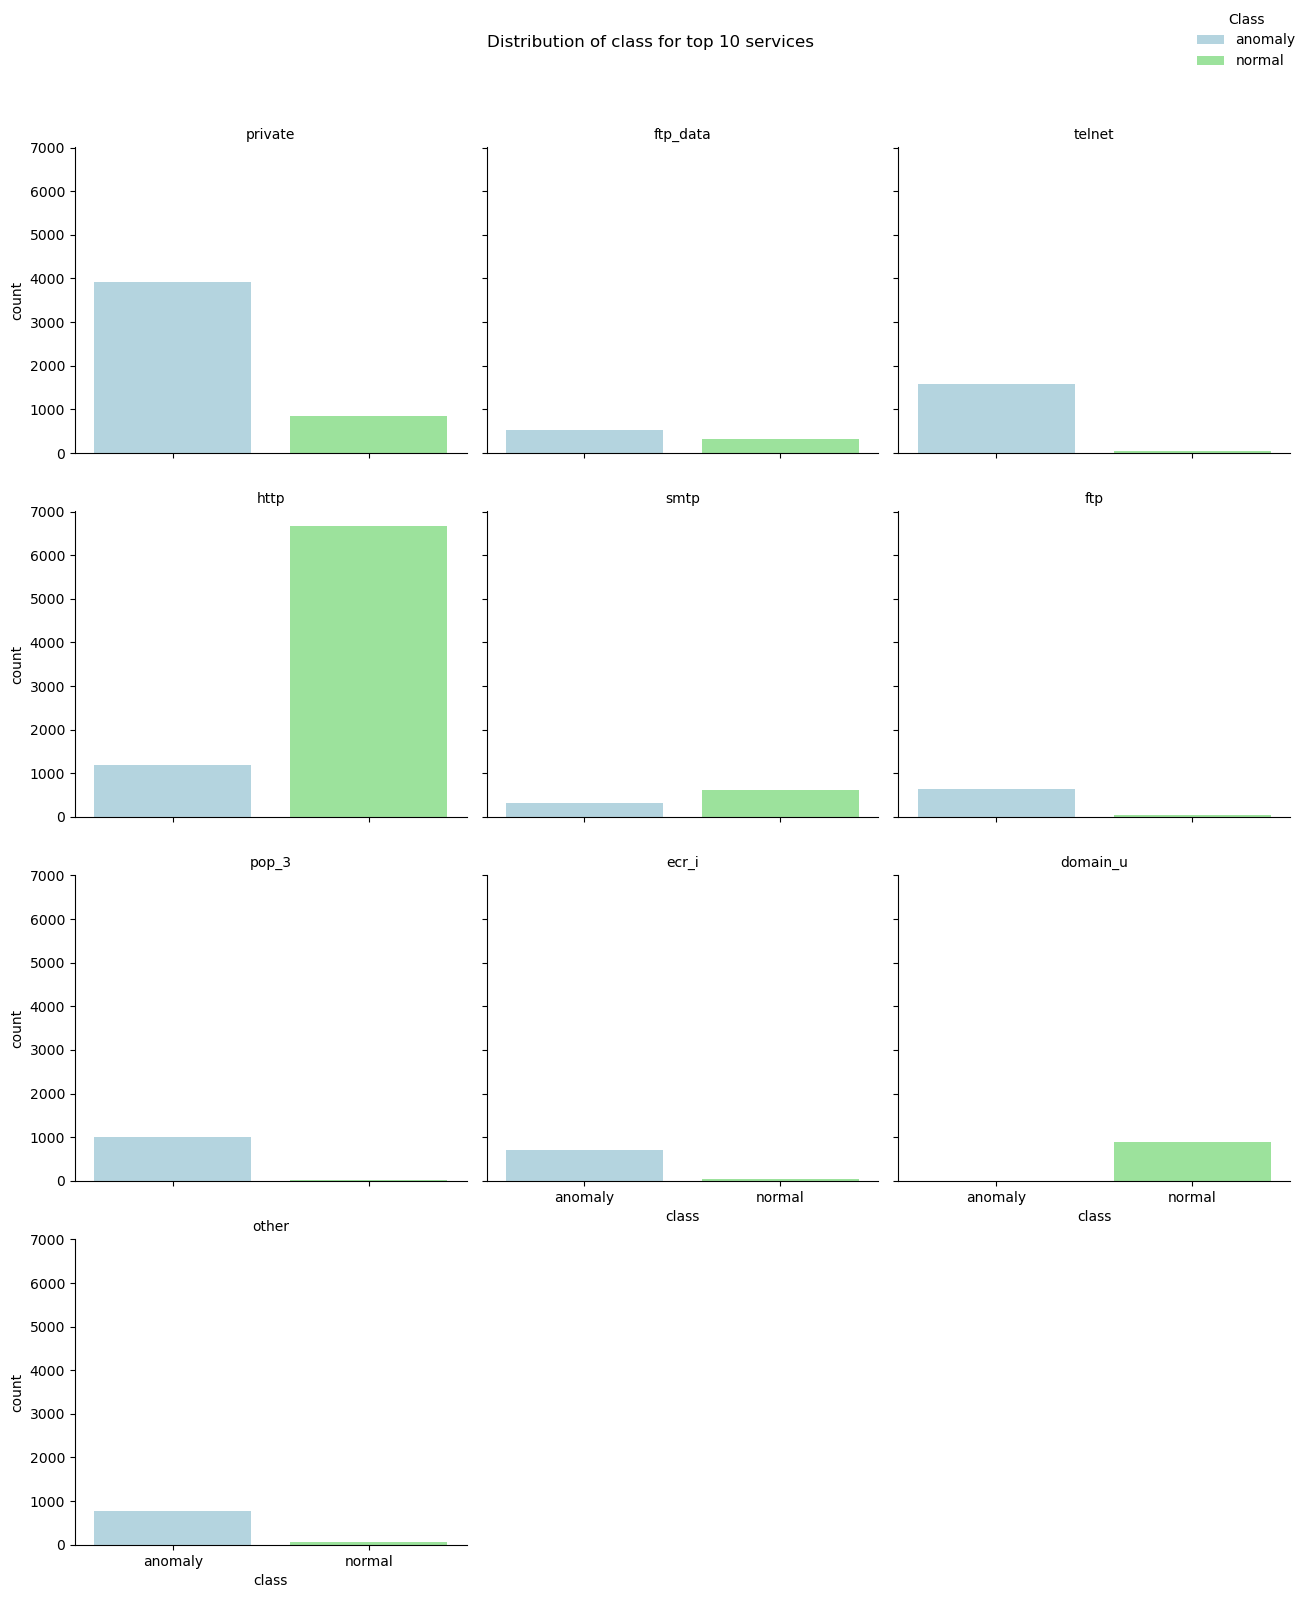

In [100]:
top_n = 10 
top_services = df['service'].value_counts().nlargest(top_n).index
df_top_services = df[df['service'].isin(top_services)]
class_order = df_top_services['class'].value_counts().index

custom_palette = ['lightblue', 'lightgreen']

g = sns.FacetGrid(df_top_services, col='service', col_wrap=3, height=4, hue='class', palette=custom_palette)
g.map(sns.countplot, 'class', order=class_order)
g.set_titles('{col_name}')
g.add_legend(title='Class', loc='upper right')  # Set the location of the legend to 'upper right'
plt.suptitle('Distribution of class for top {} services'.format(top_n))
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


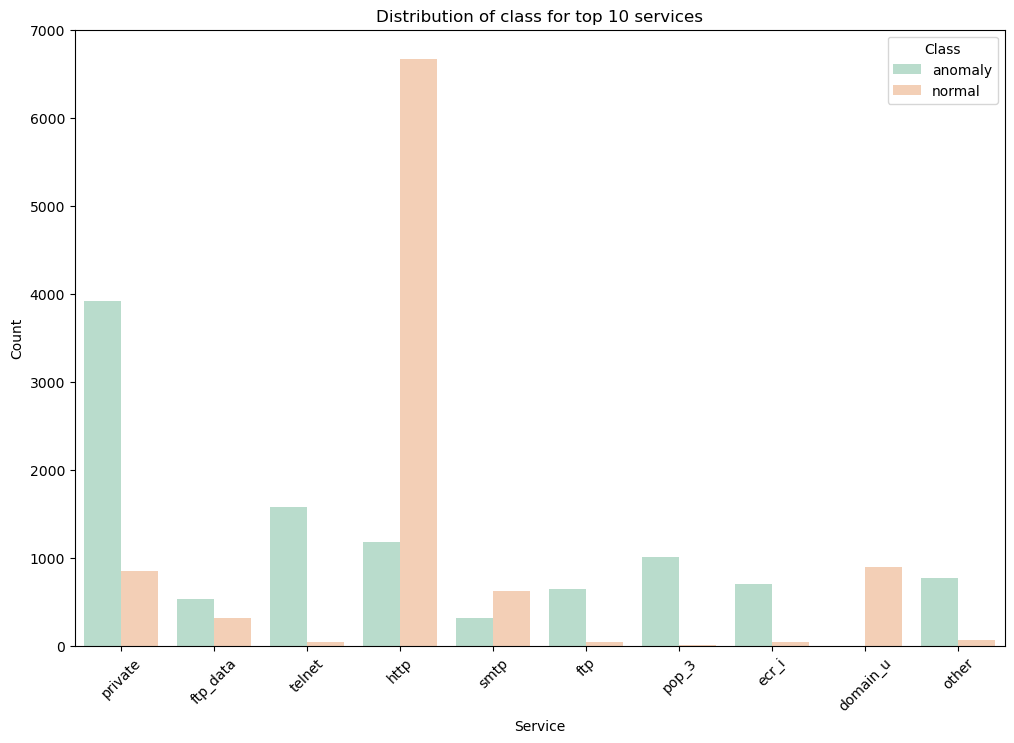

In [101]:
plt.figure(figsize=(12, 8))
sns.countplot(x='service', hue='class', data=df_top_services)
plt.title('Distribution of class for top {} services'.format(top_n))
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Class')
plt.show()

In [102]:
df['flag'].unique()

array(['REJ', 'SF', 'RSTO', 'S0', 'RSTR', 'SH', 'S3', 'S2', 'S1',
       'RSTOS0', 'OTH'], dtype=object)

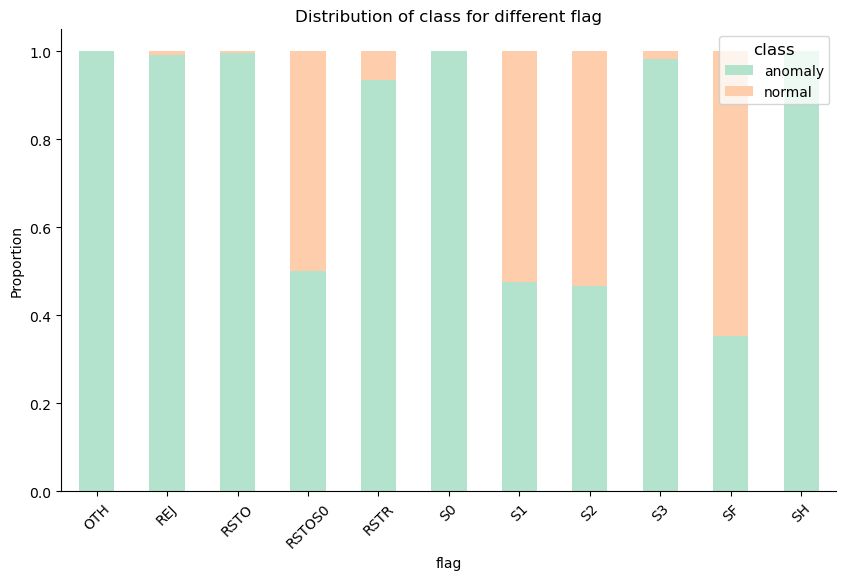

In [103]:
sns.set_palette("Pastel2")

grouped_data = df.groupby('flag')['class'].value_counts(normalize=True).unstack()
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of class for different flag')
plt.xlabel('flag')
plt.ylabel('Proportion')
plt.legend(title='class', fontsize='medium', title_fontsize='large', loc='upper right')
plt.xticks(rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


In [104]:
df.dtypes

duration                    int64
protocol_type              object
service                    object
flag                       object
src_bytes                 float64
dst_bytes                 float64
count                     float64
srv_count                 float64
serror_rate               float64
srv_serror_rate           float64
rerror_rate               float64
srv_rerror_rate           float64
same_srv_rate             float64
diff_srv_rate             float64
srv_diff_host_rate        float64
dst_host_count              int64
dst_host_srv_count          int64
dst_host_same_srv_rate    float64
class                      object
dtype: object

In [105]:
# Checking presence of outliers
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

def find_outliers_iqr(df, numerical_columns, threshold=1.5):
    outlier_count = {}
    for col in numerical_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (threshold * iqr)
        upper_bound = q3 + (threshold * iqr)
        outliers_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count[col] = len(outliers_col)
    return outlier_count

outlier_count_iqr = find_outliers_iqr(df, numerical_columns)

print("Number of outliers detected using IQR method:")
for col, count in outlier_count_iqr.items():
    print(f"{col}: {count}")


Number of outliers detected using IQR method:
duration: 3526
src_bytes: 2737
dst_bytes: 4001
count: 1329
srv_count: 2389
serror_rate: 3347
srv_serror_rate: 2913
rerror_rate: 5365
srv_rerror_rate: 5581
same_srv_rate: 0
diff_srv_rate: 2059
srv_diff_host_rate: 4975
dst_host_count: 0
dst_host_srv_count: 0
dst_host_same_srv_rate: 0


Above code shows the presence of outliers in the dataset which must be handled for data integrity.

In [106]:
numerical_columns.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate'],
      dtype='object')

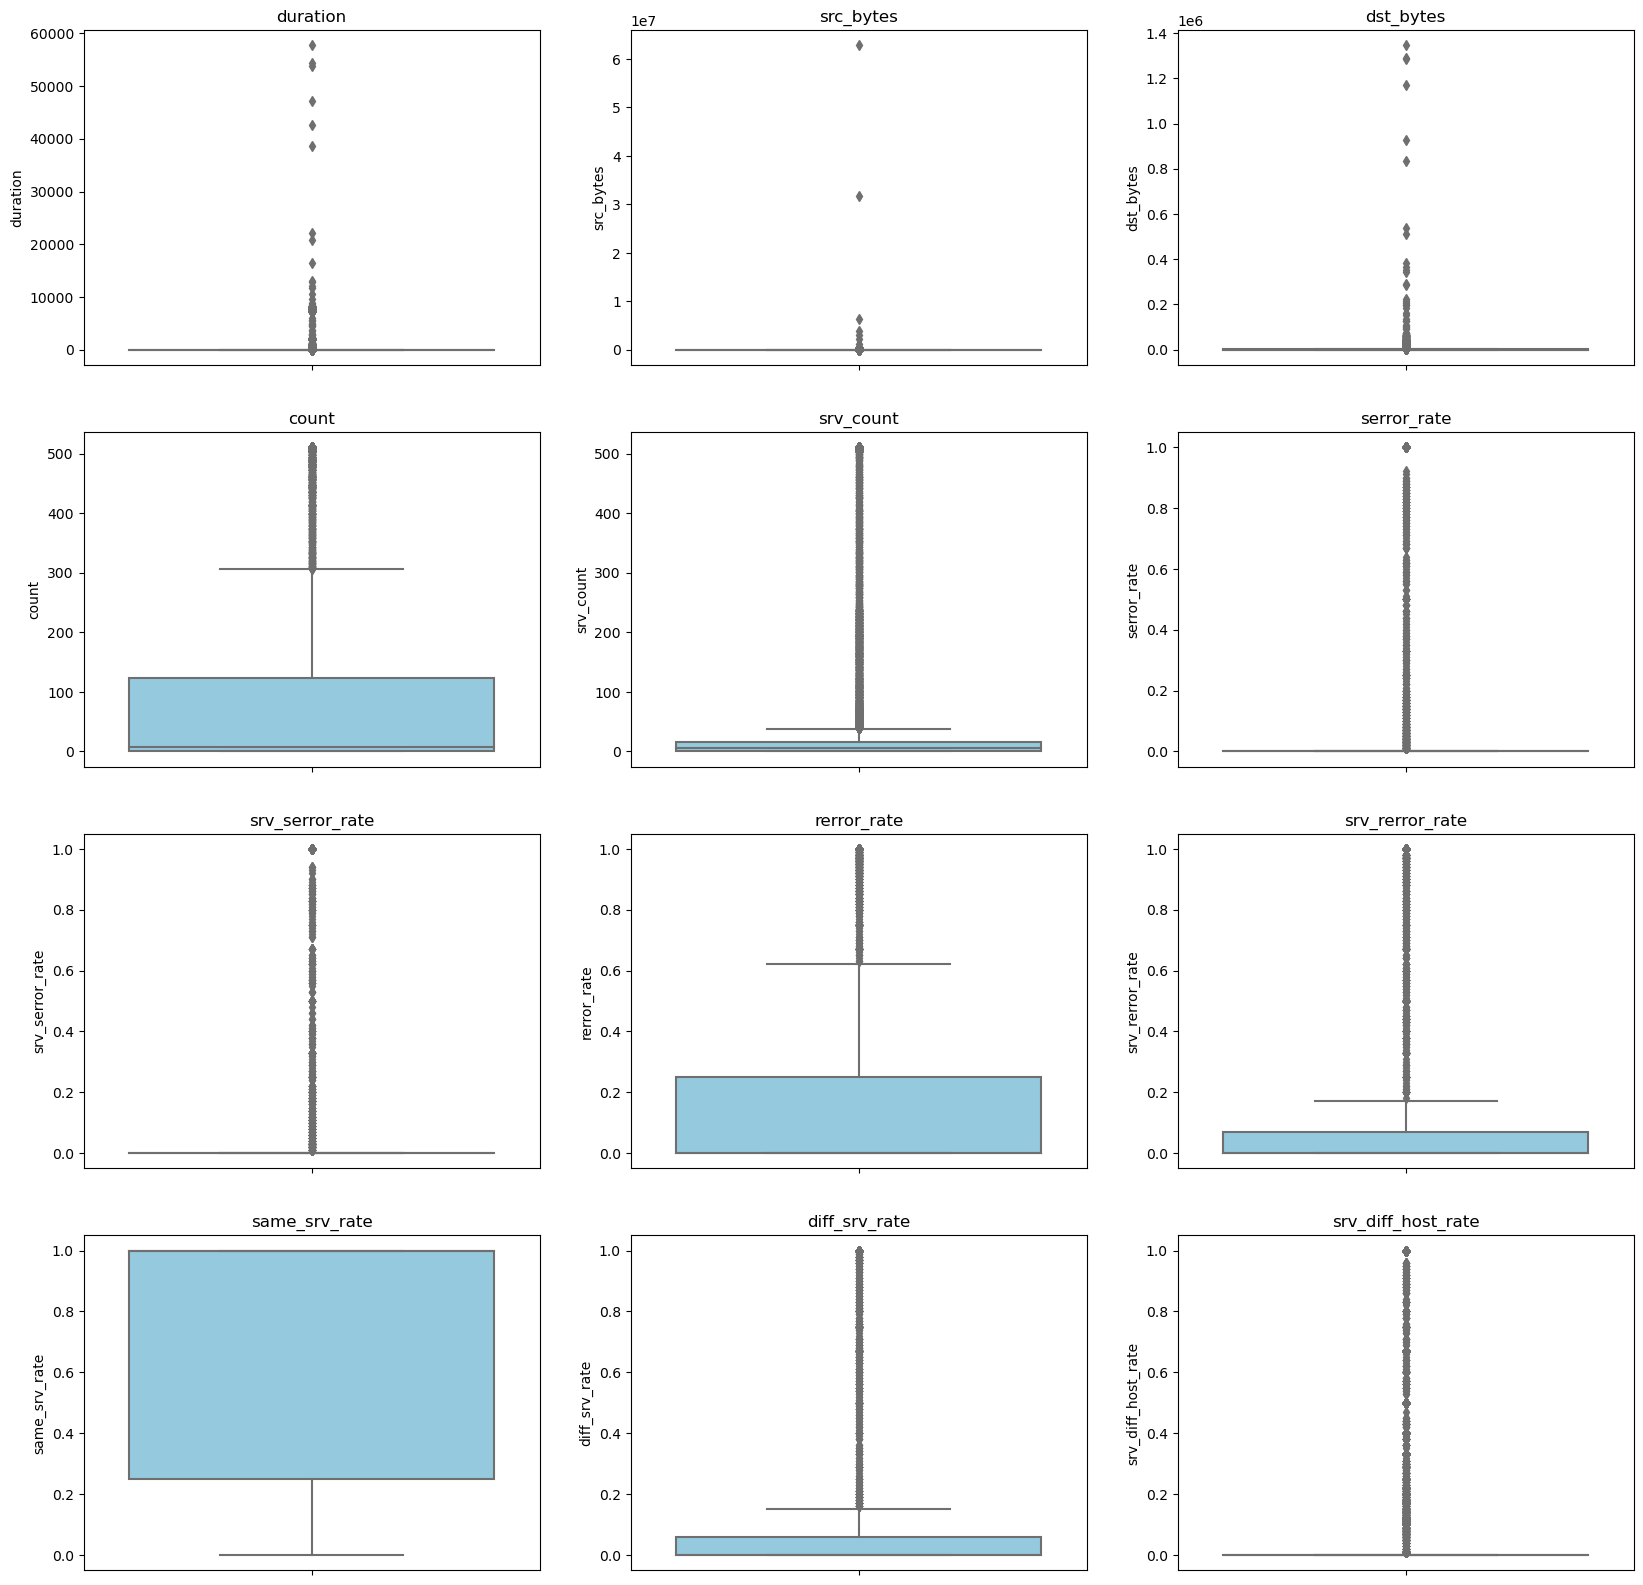

In [107]:
num_plots = len(numerical_columns)
num_rows = min(4, num_plots)
plt.figure(figsize=(20, 5 * num_rows))

for i, var in enumerate(numerical_columns[:12]):
    if i < num_rows * 3: 
        plt.subplot(num_rows, 3, i + 1)
        sns.boxplot(y=df[var], color='skyblue')
        plt.title(var)

plt.show()

In [108]:
# Removing outliers
def remove_outliers_iqr(df, numerical_columns, threshold=1.5):
    cleaned_df = df.copy()
    for col in numerical_columns:
        q1 = cleaned_df[col].quantile(0.25)
        q3 = cleaned_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (threshold * iqr)
        upper_bound = q3 + (threshold * iqr)
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df

cleaned_df = remove_outliers_iqr(df, numerical_columns)

In [109]:
cleaned_df.shape

(7206, 19)

In [110]:
cleaned_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,class
0,0,tcp,private,REJ,0.0,0.0,229.0,10.0,0.0,0.0,1.0,1.0,0.04,0.06,0.0,255,10,0.04,anomaly
1,0,tcp,private,REJ,0.0,0.0,136.0,1.0,0.0,0.0,1.0,1.0,0.01,0.06,0.0,255,1,0.00,anomaly
7,0,tcp,telnet,SF,129.0,174.0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,anomaly
9,0,tcp,ftp,SF,26.0,157.0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,52,26,0.50,anomaly
10,0,tcp,telnet,SF,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,128,0.50,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22514,0,udp,other,SF,115.0,0.0,22.0,22.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,253,22,0.09,normal
22529,0,tcp,finger,SF,9.0,139.0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,96,4,0.04,normal
22533,0,tcp,http,SF,274.0,1623.0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,92,255,1.00,normal
22534,0,tcp,private,REJ,0.0,0.0,235.0,10.0,0.0,0.0,1.0,1.0,0.04,0.06,0.0,255,10,0.04,anomaly


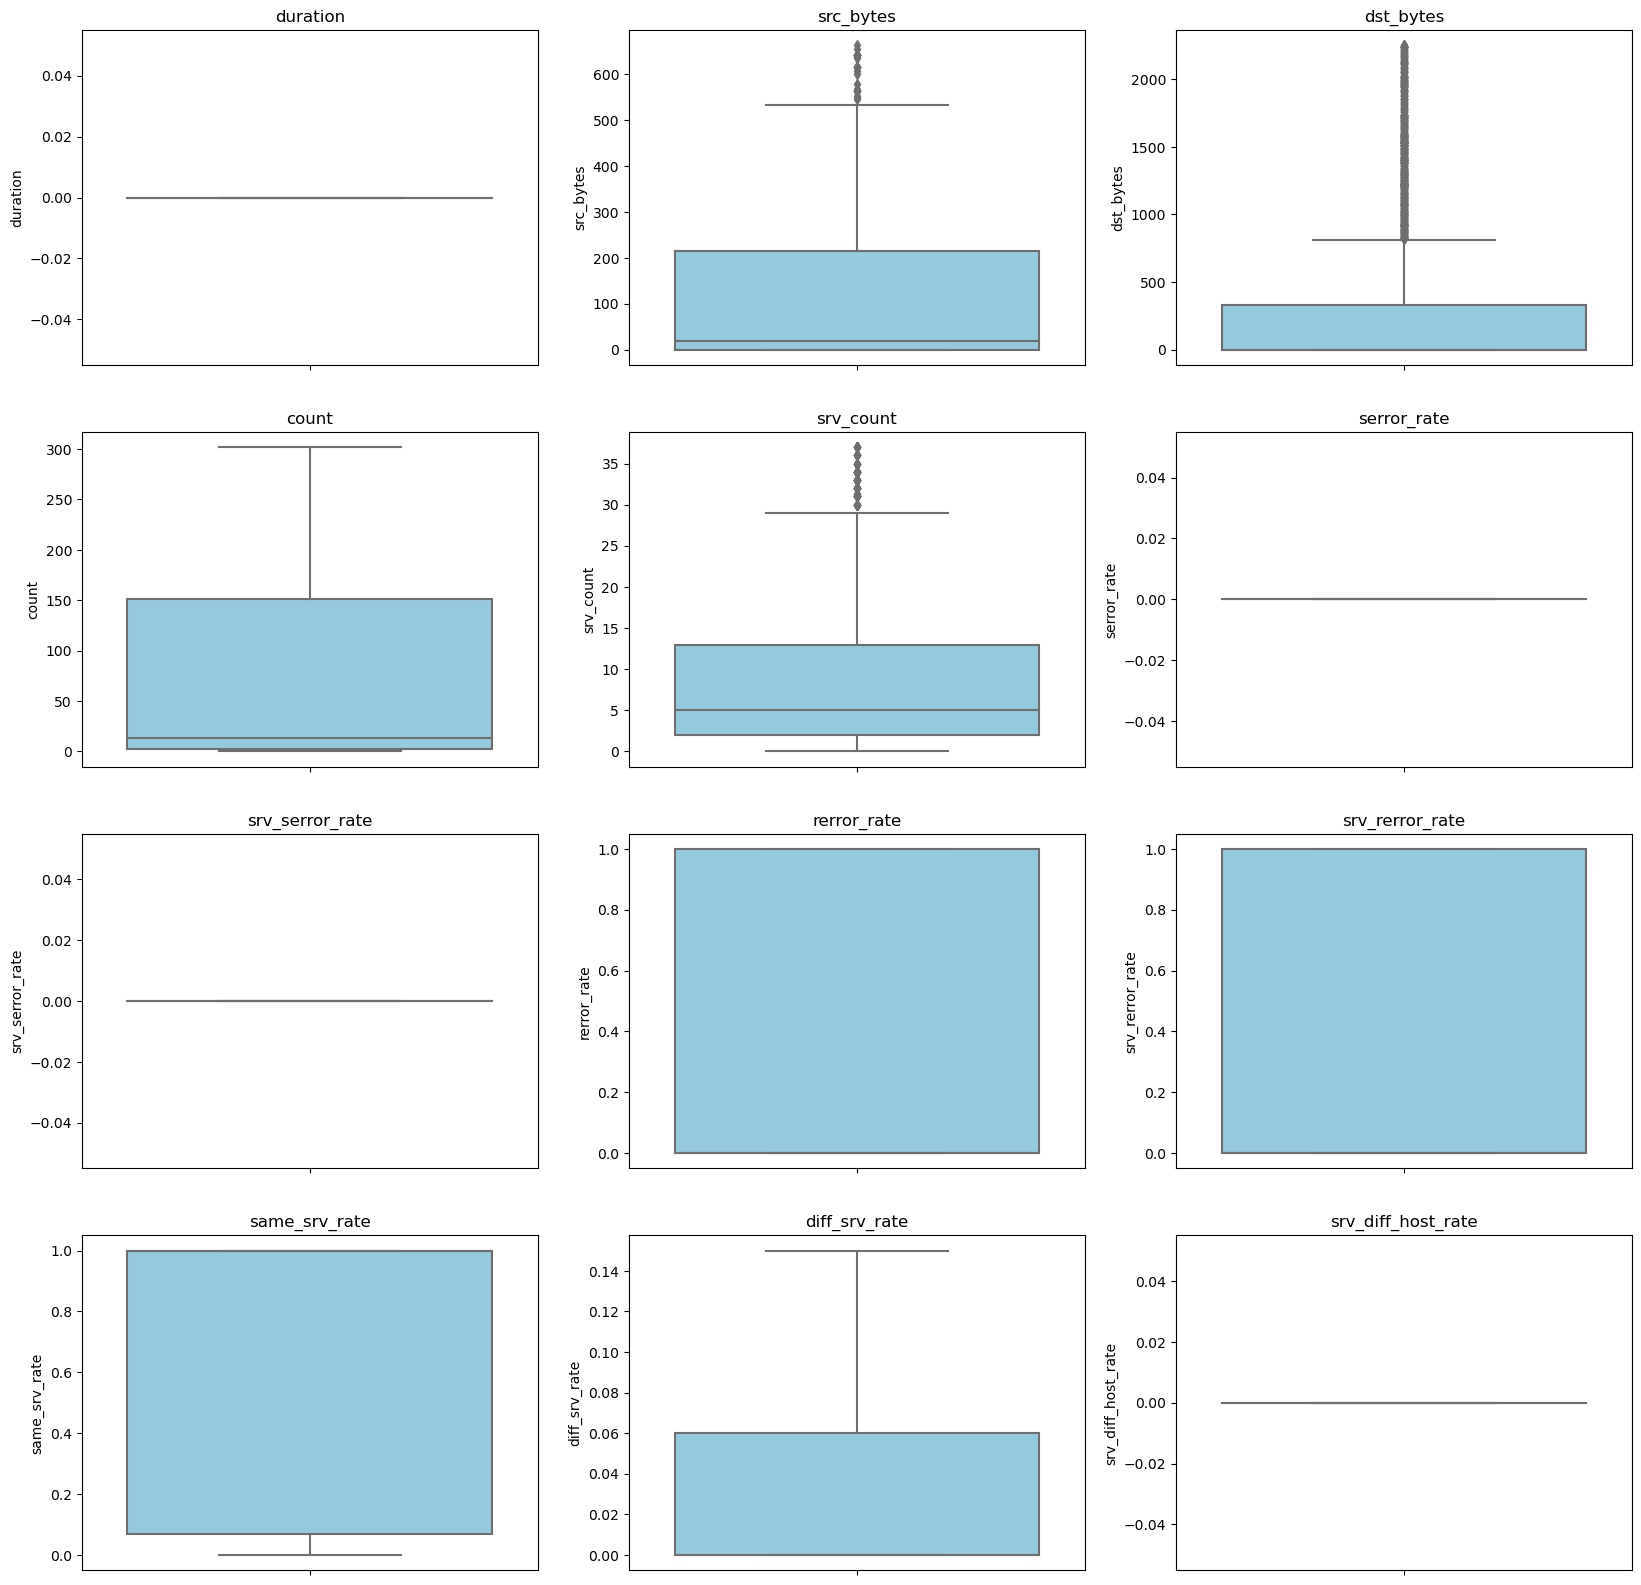

In [111]:
plt.figure(figsize=(20, 5 * num_rows))
num_plots = len(numerical_columns)
num_rows = min(4, num_plots)

for i, var in enumerate(numerical_columns[:12]):
    if i < num_rows * 3: 
        plt.subplot(num_rows, 3, i + 1)
        sns.boxplot(y=cleaned_df[var], color='skyblue')
        plt.title(var)

plt.show()


In [112]:
cleaned_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'class'],
      dtype='object')

In [113]:
cleaned_df.dtypes

duration                    int64
protocol_type              object
service                    object
flag                       object
src_bytes                 float64
dst_bytes                 float64
count                     float64
srv_count                 float64
serror_rate               float64
srv_serror_rate           float64
rerror_rate               float64
srv_rerror_rate           float64
same_srv_rate             float64
diff_srv_rate             float64
srv_diff_host_rate        float64
dst_host_count              int64
dst_host_srv_count          int64
dst_host_same_srv_rate    float64
class                      object
dtype: object

In [114]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in cleaned_df.columns:
    if cleaned_df[column].dtype == 'object':
        cleaned_df[column] = label_encoder.fit_transform(cleaned_df[column])

In [115]:
cleaned_df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,class
0,0,1,42,1,0.0,0.0,229.0,10.0,0.0,0.0,1.0,1.0,0.04,0.06,0.0,255,10,0.04,0
1,0,1,42,1,0.0,0.0,136.0,1.0,0.0,0.0,1.0,1.0,0.01,0.06,0.0,255,1,0.00,0
7,0,1,52,4,129.0,174.0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0
9,0,1,16,4,26.0,157.0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,52,26,0.50,0
10,0,1,52,4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,128,0.50,0
12,0,1,42,1,0.0,0.0,111.0,2.0,0.0,0.0,1.0,1.0,0.02,0.07,0.0,255,2,0.01,0
16,0,1,20,4,213.0,659.0,24.0,24.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,1
17,0,1,20,4,246.0,2090.0,16.0,16.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,35,255,1.00,1
19,0,1,42,1,0.0,0.0,204.0,18.0,0.0,0.0,1.0,1.0,0.09,0.07,0.0,255,18,0.07,0
20,0,1,26,1,0.0,0.0,118.0,19.0,0.0,0.0,1.0,1.0,0.16,0.05,0.0,255,19,0.07,0


In [116]:
cleaned_df.corr()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,class
duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
protocol_type,NaN,1.000000,0.254332,0.217336,-0.056182,-0.105555,-0.189808,-0.125941,NaN,NaN,-0.222659,-0.222659,0.196360,-0.168246,NaN,0.167877,0.276816,0.228180,0.006256
service,NaN,0.254332,1.000000,-0.346071,-0.415191,-0.397958,0.268476,-0.064383,NaN,NaN,0.352203,0.352205,-0.321721,0.319135,NaN,0.431816,-0.278081,-0.365363,-0.487564
flag,NaN,0.217336,-0.346071,1.000000,0.683164,0.494193,-0.857990,-0.257987,NaN,NaN,-0.973369,-0.973370,0.936135,-0.901325,NaN,-0.488436,0.771664,0.864152,0.664998
src_bytes,NaN,-0.056182,-0.415191,0.683164,1.000000,0.691604,-0.574703,0.045750,NaN,NaN,-0.697537,-0.697537,0.651619,-0.641928,NaN,-0.361723,0.757864,0.717644,0.783470
dst_bytes,NaN,-0.105555,-0.397958,0.494193,0.691604,1.000000,-0.411288,0.086540,NaN,NaN,-0.505333,-0.505333,0.470690,-0.463396,NaN,-0.320919,0.608707,0.567420,0.664429
count,NaN,-0.189808,0.268476,-0.857990,-0.574703,-0.411288,1.000000,0.337937,NaN,NaN,0.838295,0.838293,-0.921063,0.861536,NaN,0.442150,-0.660715,-0.747855,-0.571947
srv_count,NaN,-0.125941,-0.064383,-0.257987,0.045750,0.086540,0.337937,1.000000,NaN,NaN,0.240576,0.240580,-0.287819,0.289951,NaN,0.183654,-0.016875,-0.114967,0.045532
serror_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
srv_serror_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
cleaned_df = cleaned_df.drop(columns=['duration', 'serror_rate', 'srv_serror_rate','srv_diff_host_rate'])

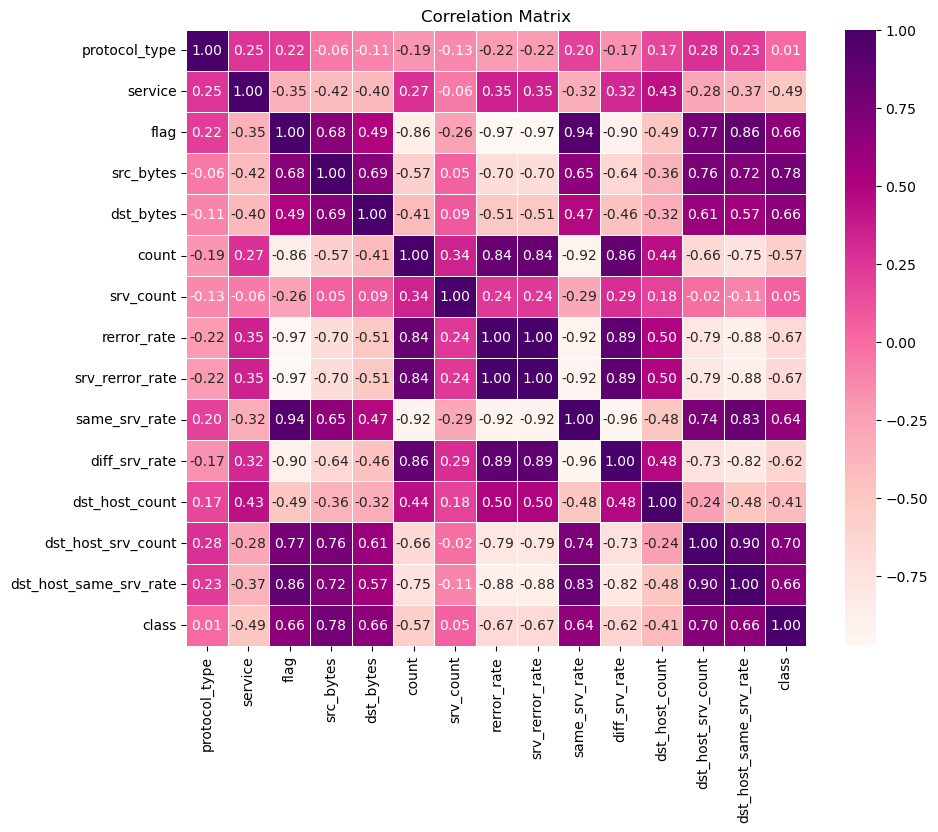

In [118]:
correlation_matrix = cleaned_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5, cmap='RdPu')
plt.title('Correlation Matrix')
plt.show()

In [119]:
cleaned_df = cleaned_df.drop(columns=['rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_same_srv_rate'])

In [120]:
cleaned_df.columns

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'count',
       'srv_count', 'srv_rerror_rate', 'dst_host_count', 'dst_host_srv_count',
       'class'],
      dtype='object')

In [121]:
cleaned_df['class'] = cleaned_df['class'].astype('category')

In [122]:
cleaned_df

,protocol_type,service,flag,src_bytes,dst_bytes,count,srv_count,srv_rerror_rate,dst_host_count,dst_host_srv_count,class
0,1,42,1,0.0,0.0,229.0,10.0,1.0,255,10,0
1,1,42,1,0.0,0.0,136.0,1.0,1.0,255,1,0
7,1,52,4,129.0,174.0,1.0,1.0,0.0,255,255,0
9,1,16,4,26.0,157.0,1.0,1.0,0.0,52,26,0
10,1,52,4,0.0,0.0,1.0,1.0,0.0,255,128,0
...,...,...,...,...,...,...,...,...,...,...,...
22514,2,38,4,115.0,0.0,22.0,22.0,0.0,253,22,1
22529,1,15,4,9.0,139.0,1.0,1.0,0.0,96,4,1
22533,1,20,4,274.0,1623.0,1.0,1.0,0.0,92,255,1
22534,1,42,1,0.0,0.0,235.0,10.0,1.0,255,10,0


In [123]:
from sklearn.preprocessing import StandardScaler

X = cleaned_df.drop(columns=['class'])
y = cleaned_df['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.reset_index(drop=True, inplace=True)

combined_df = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

In [124]:
X_scaled.shape

(7206, 10)

In [125]:
y.shape

(7206,)

In [126]:
combined_df.shape

(7206, 11)

In [127]:
combined_df.isnull().sum()

protocol_type         0
service               0
flag                  0
src_bytes             0
dst_bytes             0
count                 0
srv_count             0
srv_rerror_rate       0
dst_host_count        0
dst_host_srv_count    0
class                 0
dtype: int64

In [128]:
combined_df

,protocol_type,service,flag,src_bytes,dst_bytes,count,srv_count,srv_rerror_rate,dst_host_count,dst_host_srv_count,class
0,-0.247801,0.782637,-1.214300,-0.782189,-0.564874,1.448406,0.300187,1.113584,0.600455,-0.897696,0
1,-0.247801,0.782637,-1.214300,-0.782189,-0.564874,0.528536,-0.955734,1.113584,0.600455,-0.976287,0
2,-0.247801,1.509026,0.877059,0.242490,-0.236767,-0.806759,-0.955734,-0.898539,0.600455,1.241745,0
3,-0.247801,-1.105974,0.877059,-0.575665,-0.268824,-0.806759,-0.955734,-0.898539,-1.604666,-0.757977,0
4,-0.247801,1.509026,0.877059,-0.782189,-0.564874,-0.806759,-0.955734,-0.898539,0.600455,0.132729,0
...,...,...,...,...,...,...,...,...,...,...,...
7201,2.609250,0.492082,0.877059,0.131284,-0.564874,-0.599046,1.974749,-0.898539,0.578730,-0.792907,1
7202,-0.247801,-1.178613,0.877059,-0.710700,-0.302766,-0.806759,-0.955734,-0.898539,-1.126708,-0.950090,1
7203,-0.247801,-0.815419,0.877059,1.394260,2.495569,-0.806759,-0.955734,-0.898539,-1.170159,1.241745,1
7204,-0.247801,0.782637,-1.214300,-0.782189,-0.564874,1.507753,0.300187,1.113584,0.600455,-0.897696,0


In [129]:
# Number of independent and dependent variables
indep_var = combined_df.columns[:-1]
indep_var_count = len(indep_var)
print('Number of independent variables: ', indep_var_count)

dep_var = combined_df.columns[-1:]
dep_var_count = len(dep_var)
print('Number of dependent variables: ', dep_var_count)

Number of independent variables:  10
Number of dependent variables:  1


In [130]:
# Number of records
num_records = len(combined_df)
print("Number of records:", num_records)

Number of records: 7206


In [131]:
binary_columns = []
nominal_columns = []
categorical_columns = []
textual_columns = []
numerical_columns = []

for column, dtype in combined_df.dtypes.items():
    if dtype == 'bool':
        binary_columns.append(column)
    elif dtype == 'object':
        if len(df[column].unique()) == 2:
            binary_columns.append(column)
        else:
            nominal_columns.append(column)
    elif dtype == 'category':
        categorical_columns.append(column)
    elif dtype == 'float64' or dtype == 'int64':
        numerical_columns.append(column)
    elif dtype == 'string':
        textual_columns.append(column)

print("Binary columns:", binary_columns)
print("\nNominal columns:", nominal_columns)
print("\nCategorical columns:", categorical_columns)
print("\nTextual columns:", textual_columns)
print("\nNumerical columns:", numerical_columns)

Binary columns: []

Nominal columns: []

Categorical columns: ['class']

Textual columns: []

Numerical columns: ['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'srv_rerror_rate', 'dst_host_count', 'dst_host_srv_count']


In [ ]:
combined_df.describe().transpose()

# Storing Preprocessed Data as a CSV

In [132]:
combined_df.to_csv('cleaned_network.csv', index=False)